<a href="https://colab.research.google.com/github/Abrx1921/Data-Science-Portfolio/blob/main/Linear_Regression_Housing_AbrahamSS_Project_V01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing Price Prediction**

### CNM Ingenuity: Deep Dive Data Science Bootcamp Project 2

###  **By:** Abraham Saenz Sigala
###  **Date:** 12/20/2025

v01:

- Ridge Regression

Techniques implemented:
- Data Cleaning
- Feature scaling
- Log Transform Target
- Residual Analysis
- Cross Validation (x500)

Perfomance Metric:
- Minimize RMSPE
  - “On average, how far off are my predictions, in % terms, from the true housing prices?”

In [ ]:
# Import initial libraries for data cleaning, manipulation, and exploration.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load in the dataset
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'
url


'https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv'

In [ ]:
# Read in the csv from our link
data = pd.read_csv(url)


In [ ]:
# Ensure it loaded in correctly
data


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000


## Problem Definition


What we are  essentially trying to do is build a model that will allow us to predict the price of houses given historical sale price data.

Supervised Learning Problem: We have a target variable (SalePrice).

Regression: Our sale target variable is Numerical & Continous.

## Data Collection/Sources


Data Source:

The data is available on AWS S3 at: https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv

A data dictionary file is available at AWS S3 at: https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Housing%20-%20Data%20Documentation.pdf

## Intital Data Exploration

In [ ]:
# Intital Data Exploration
data.sample(5)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2127,923225300,160,RM,NaN,1974,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,83500
2576,905402110,20,RL,75.0,9375,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,146000
1954,527254070,20,RL,69.0,11302,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,319000
177,902205130,30,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,108500
2206,528172070,20,RL,71.0,9254,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,232698


In [ ]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [ ]:
# Different Data types
data.dtypes.value_counts()

,count
object,43
int64,27
float64,11


In [ ]:
# of rows/columns
data.shape

(2637, 81)

In [ ]:
# Column names
data.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [ ]:
# Summary stats
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PID,2637.0,7.141301e+08,1.887527e+08,526301100.0,5.284770e+08,535453040.0,9.071870e+08,1.007100e+09
MS SubClass,2637.0,5.734926e+01,4.249909e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2188.0,6.916682e+01,2.335678e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2637.0,1.004469e+04,6.742550e+03,1300.0,7.436000e+03,9450.0,1.152600e+04,1.646600e+05
Overall Qual,2637.0,6.097459e+00,1.411522e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2637.0,5.569966e+00,1.118262e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2637.0,1.971289e+03,3.030699e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2637.0,1.984203e+03,2.091308e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2614.0,1.018879e+02,1.795782e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2636.0,4.384412e+02,4.496023e+02,0.0,0.000000e+00,368.0,7.320000e+02,5.644000e+03


In [ ]:
# Cols with null values
null_values = data.isna().sum()[data.isna().sum() > 0].sort_values(ascending = False)

In [ ]:
null_values

,0
Pool QC,2626
Misc Feature,2541
Alley,2457
Fence,2109
Mas Vnr Type,1607
Fireplace Qu,1284
Lot Frontage,449
Garage Cond,147
Garage Yr Blt,147
Garage Finish,147


In [ ]:
# Find the % of missing values in columns
null_values_percent = ((null_values / data.shape[0]) * 100).round(2).sort_values(ascending = False)
null_values_percent

,0
Pool QC,99.58
Misc Feature,96.36
Alley,93.17
Fence,79.98
Mas Vnr Type,60.94
Fireplace Qu,48.69
Lot Frontage,17.03
Garage Cond,5.57
Garage Yr Blt,5.57
Garage Finish,5.57


In [ ]:
# Identify if there are any null values in our target variable
data["SalePrice"].isna().sum()


np.int64(0)

In [ ]:
# See how skewed our data is
data.select_dtypes(include="number").skew().sort_values(ascending=False)


,0
Misc Val,19.634807
Pool Area,17.663970
Low Qual Fin SF,12.468150
3Ssn Porch,11.070713
Lot Area,10.456234
Kitchen AbvGr,4.420426
BsmtFin SF 2,4.092977
Screen Porch,4.013845
Bsmt Half Bath,3.996867
Enclosed Porch,3.046149


Our intial data exploration reveals a few things:

- 2637 rows and 81 columns
- 1 id column
- 3 Datatypes: Int64, Float64, Object
- Some columns contain > 50% na values
- Target Variable has no missing values!
- Data is mostly right skewed > 1

## Data Cleaning


In [ ]:
# Creating a copy of the data
df = data.copy()
df


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,903231070,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500
2633,906201021,80,RL,74.0,10778,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,162000
2634,533253070,120,RL,61.0,3782,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,211500
2635,527376100,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,165000


In [ ]:
# Dropping identifiers
df = df.drop(columns= ['PID'])

In [ ]:
# Drop Columns with more than 40% missing values
cols_to_drop = [
    "Pool QC",
    "Misc Feature",
    "Alley",
    "Fence",
    "Mas Vnr Type",
    "Fireplace Qu"
]


In [ ]:
# Dropping columns
df = df.drop(columns = cols_to_drop)
df.shape


(2637, 74)

In [ ]:
# Columns to impute
df.columns[df.isna().any()]

Index(['Lot Frontage', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond'],
      dtype='object')

In [ ]:
to_impute = df[['Lot Frontage', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']]

In [ ]:
# Numeric Columns to Impute
numeric_columns = to_impute.select_dtypes(include=['float64', 'int64']).columns
numeric_columns


Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [ ]:
numeric_columns

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [ ]:
# Loop: Impute the median for our missing numeric values b/c of skewedness
for i in numeric_columns:
  median_impute = df[i].median()
  df[i] = df[i].fillna(median_impute)


In [ ]:
# Remaining Columns with Null Values
df.columns[df.isna().any()]

Index(['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin Type 2', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond'],
      dtype='object')

In [ ]:
categorical_columns = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin Type 2', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond']

In [ ]:
# Confirm object dtypes
df.loc[:, df.isna().any()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Bsmt Qual       2564 non-null   object
 1   Bsmt Cond       2564 non-null   object
 2   Bsmt Exposure   2561 non-null   object
 3   BsmtFin Type 1  2564 non-null   object
 4   BsmtFin Type 2  2563 non-null   object
 5   Garage Type     2492 non-null   object
 6   Garage Finish   2490 non-null   object
 7   Garage Qual     2490 non-null   object
 8   Garage Cond     2490 non-null   object
dtypes: object(9)
memory usage: 185.5+ KB


In [ ]:
# Loop: Impute catergorical features with "None"
for i in categorical_columns:
  df[i] = df[i].fillna('None')


In [ ]:
print(f"Null Values: {df.isna().sum().sum()}")


Null Values: 0


## Exploratory Data Analysis


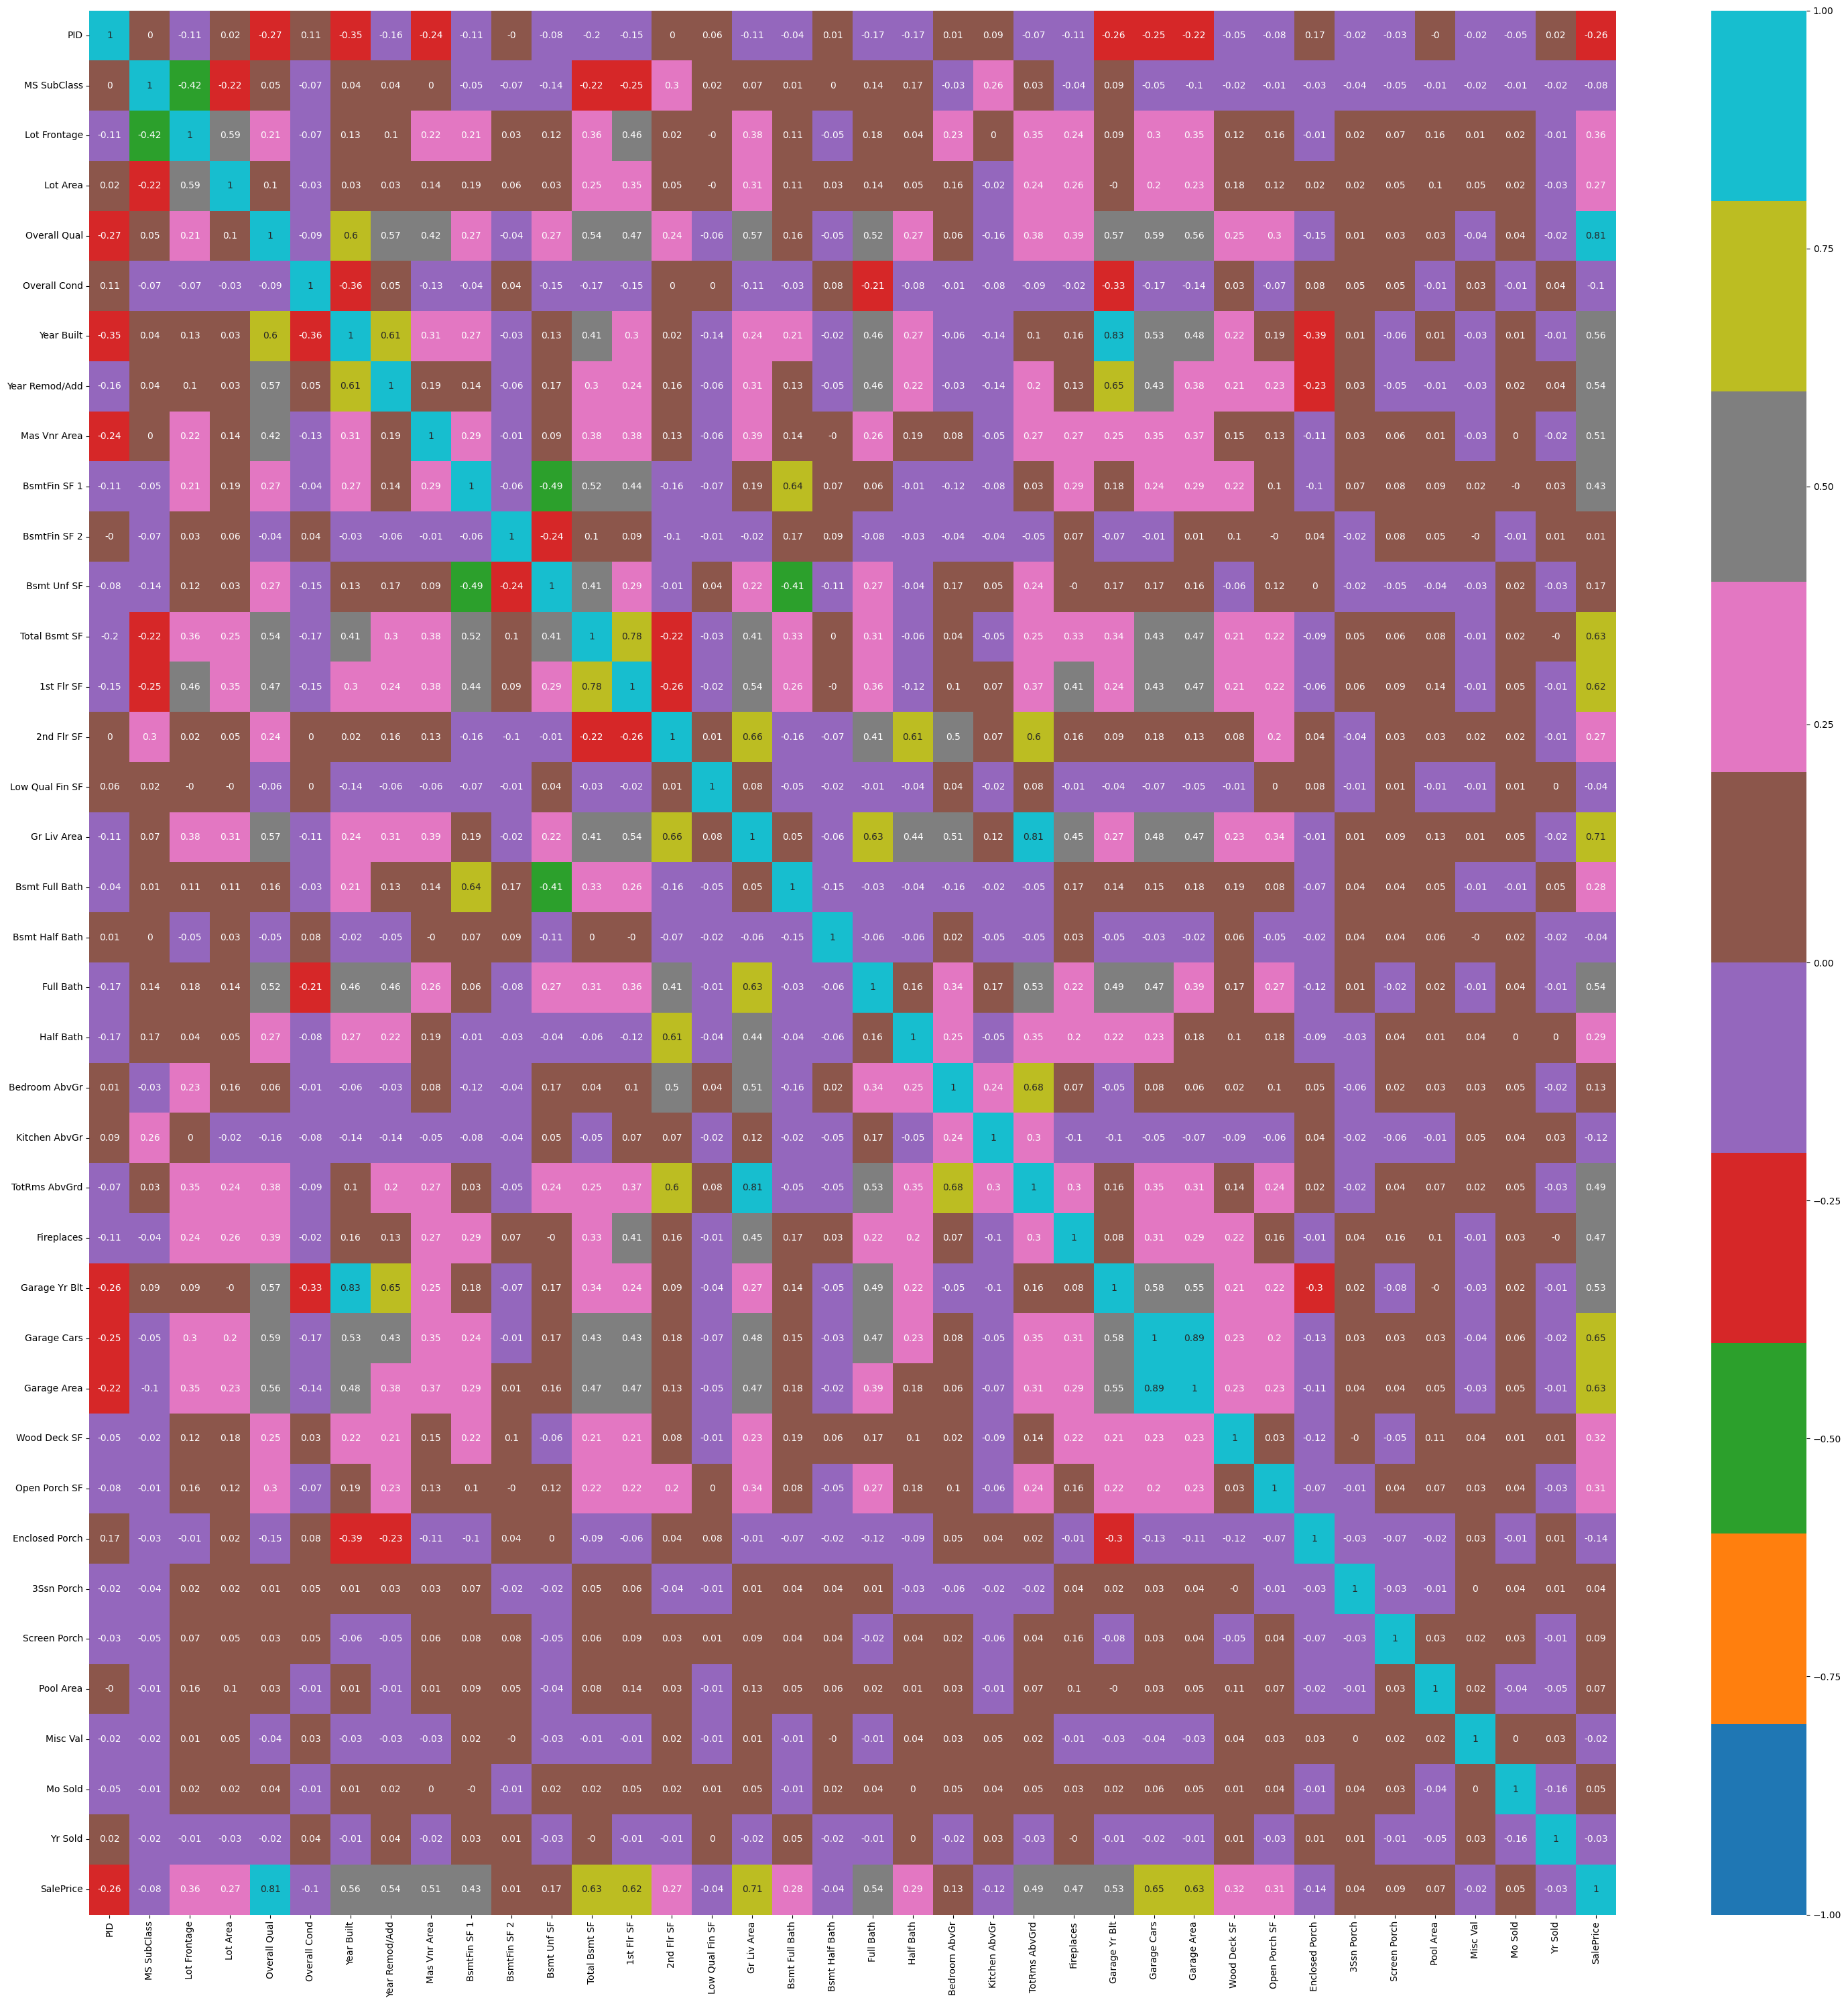

In [ ]:
# Identifity non independent features

plt.figure(figsize = (30, 30))
sns.heatmap(data.corr(numeric_only = True).round(2), vmin = -1, vmax = 1, cmap = 'tab10', annot = True)
plt.tight_layout()
plt.show()


In [ ]:
# Correlation >= 0.7

threshold = 0.7

# Corr for numeric features
corr = df.select_dtypes(include="number").corr().abs()

In [ ]:
# Drop Sale Price. Absolute values to find high correlation. Unstack so it looks like a list + sort.
corr_sort = corr.drop(columns = "SalePrice", index = "SalePrice").abs().unstack().sort_values(ascending = False)
corr_sort

,,0
MS SubClass,MS SubClass,1.000000
Yr Sold,Yr Sold,1.000000
Mo Sold,Mo Sold,1.000000
Half Bath,Half Bath,1.000000
Screen Porch,Screen Porch,1.000000
...,...,...
Low Qual Fin SF,Open Porch SF,0.000429
Wood Deck SF,3Ssn Porch,0.000241
3Ssn Porch,Wood Deck SF,0.000241
Mo Sold,Misc Val,0.000197


In [ ]:
# View final correlations above the threshold
corr_sort[(corr_sort > threshold) & (corr_sort < 1)]

,,0
Garage Area,Garage Cars,0.892028
Garage Cars,Garage Area,0.892028
Gr Liv Area,TotRms AbvGrd,0.807065
TotRms AbvGrd,Gr Liv Area,0.807065
Garage Yr Blt,Year Built,0.783153
Year Built,Garage Yr Blt,0.783153
Total Bsmt SF,1st Flr SF,0.782659
1st Flr SF,Total Bsmt SF,0.782659


These feature pairs exhibit strong multicollinearity (|r| ≥ 0.7):

- Garage Area ↔ Garage Cars (r ≈ 0.89)

- Gr Liv Area ↔ TotRms AbvGrd (r ≈ 0.81)

- Garage Yr Blt ↔ Year Built (r ≈ 0.78)

- Total Bsmt SF ↔ 1st Flr SF (r ≈ 0.78)

In [ ]:
print(f"Number of numeric columns: {df.select_dtypes(include='number').shape[1]}")


Number of numeric columns: 37


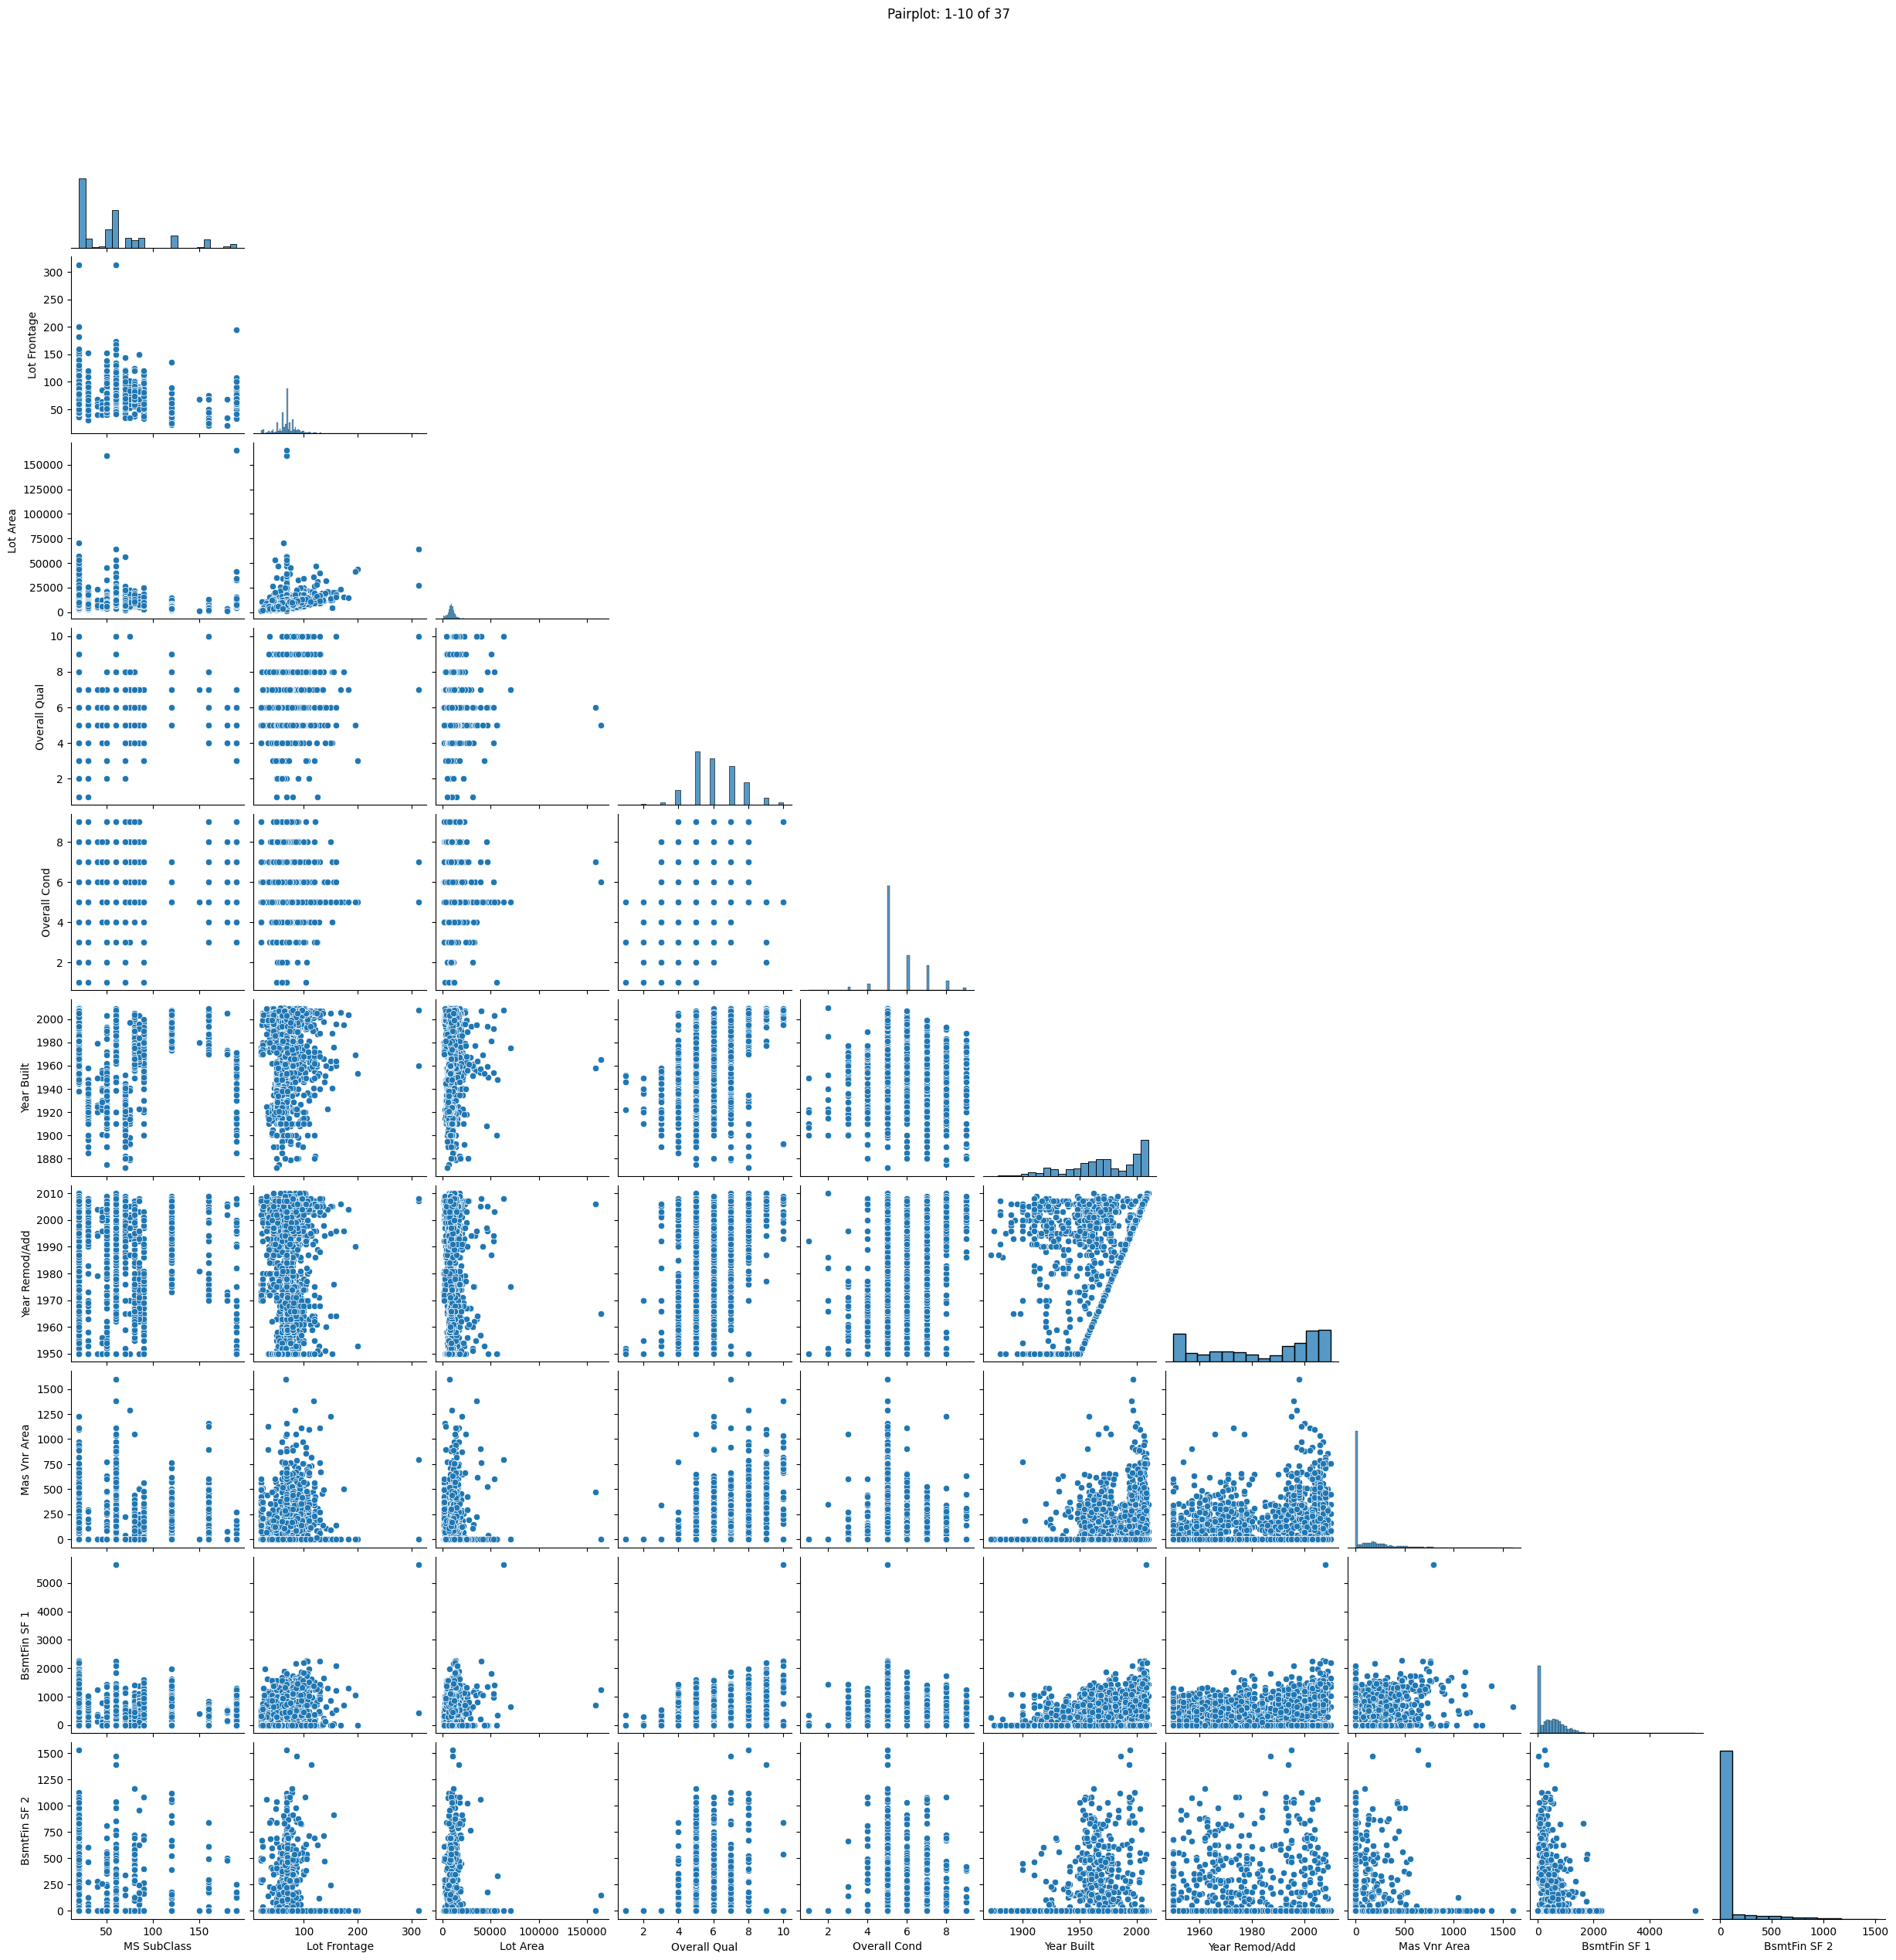

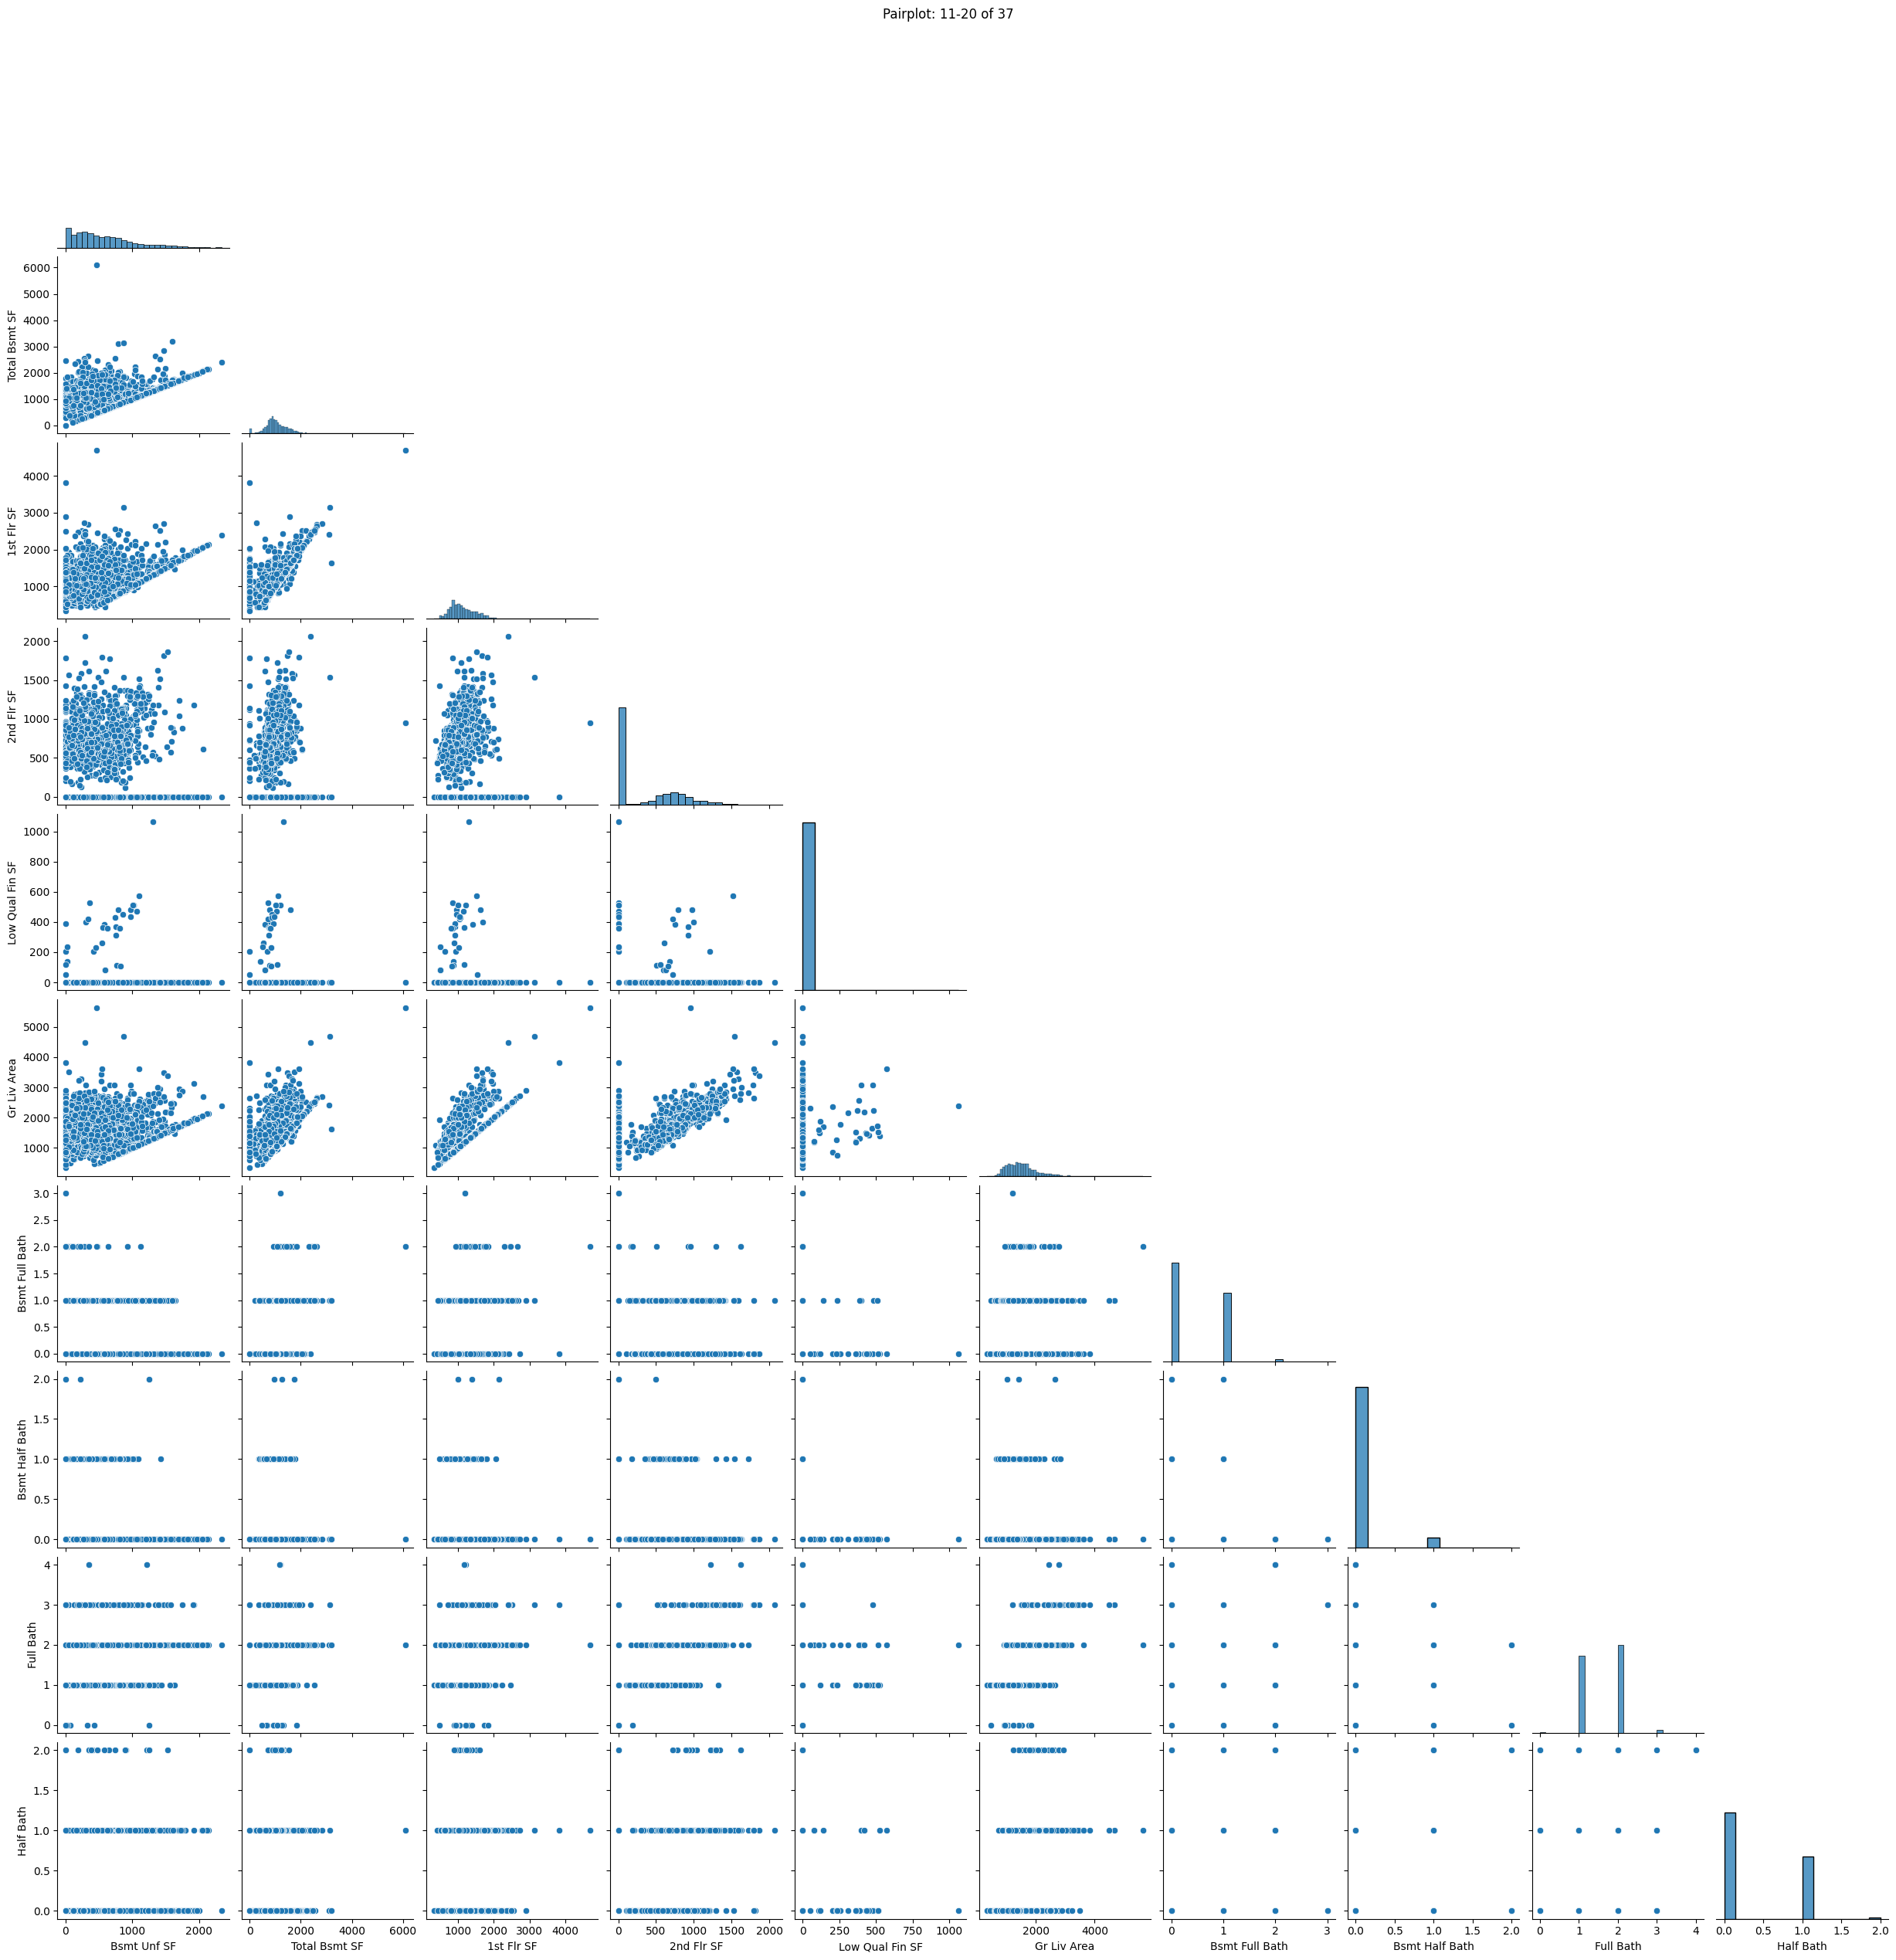

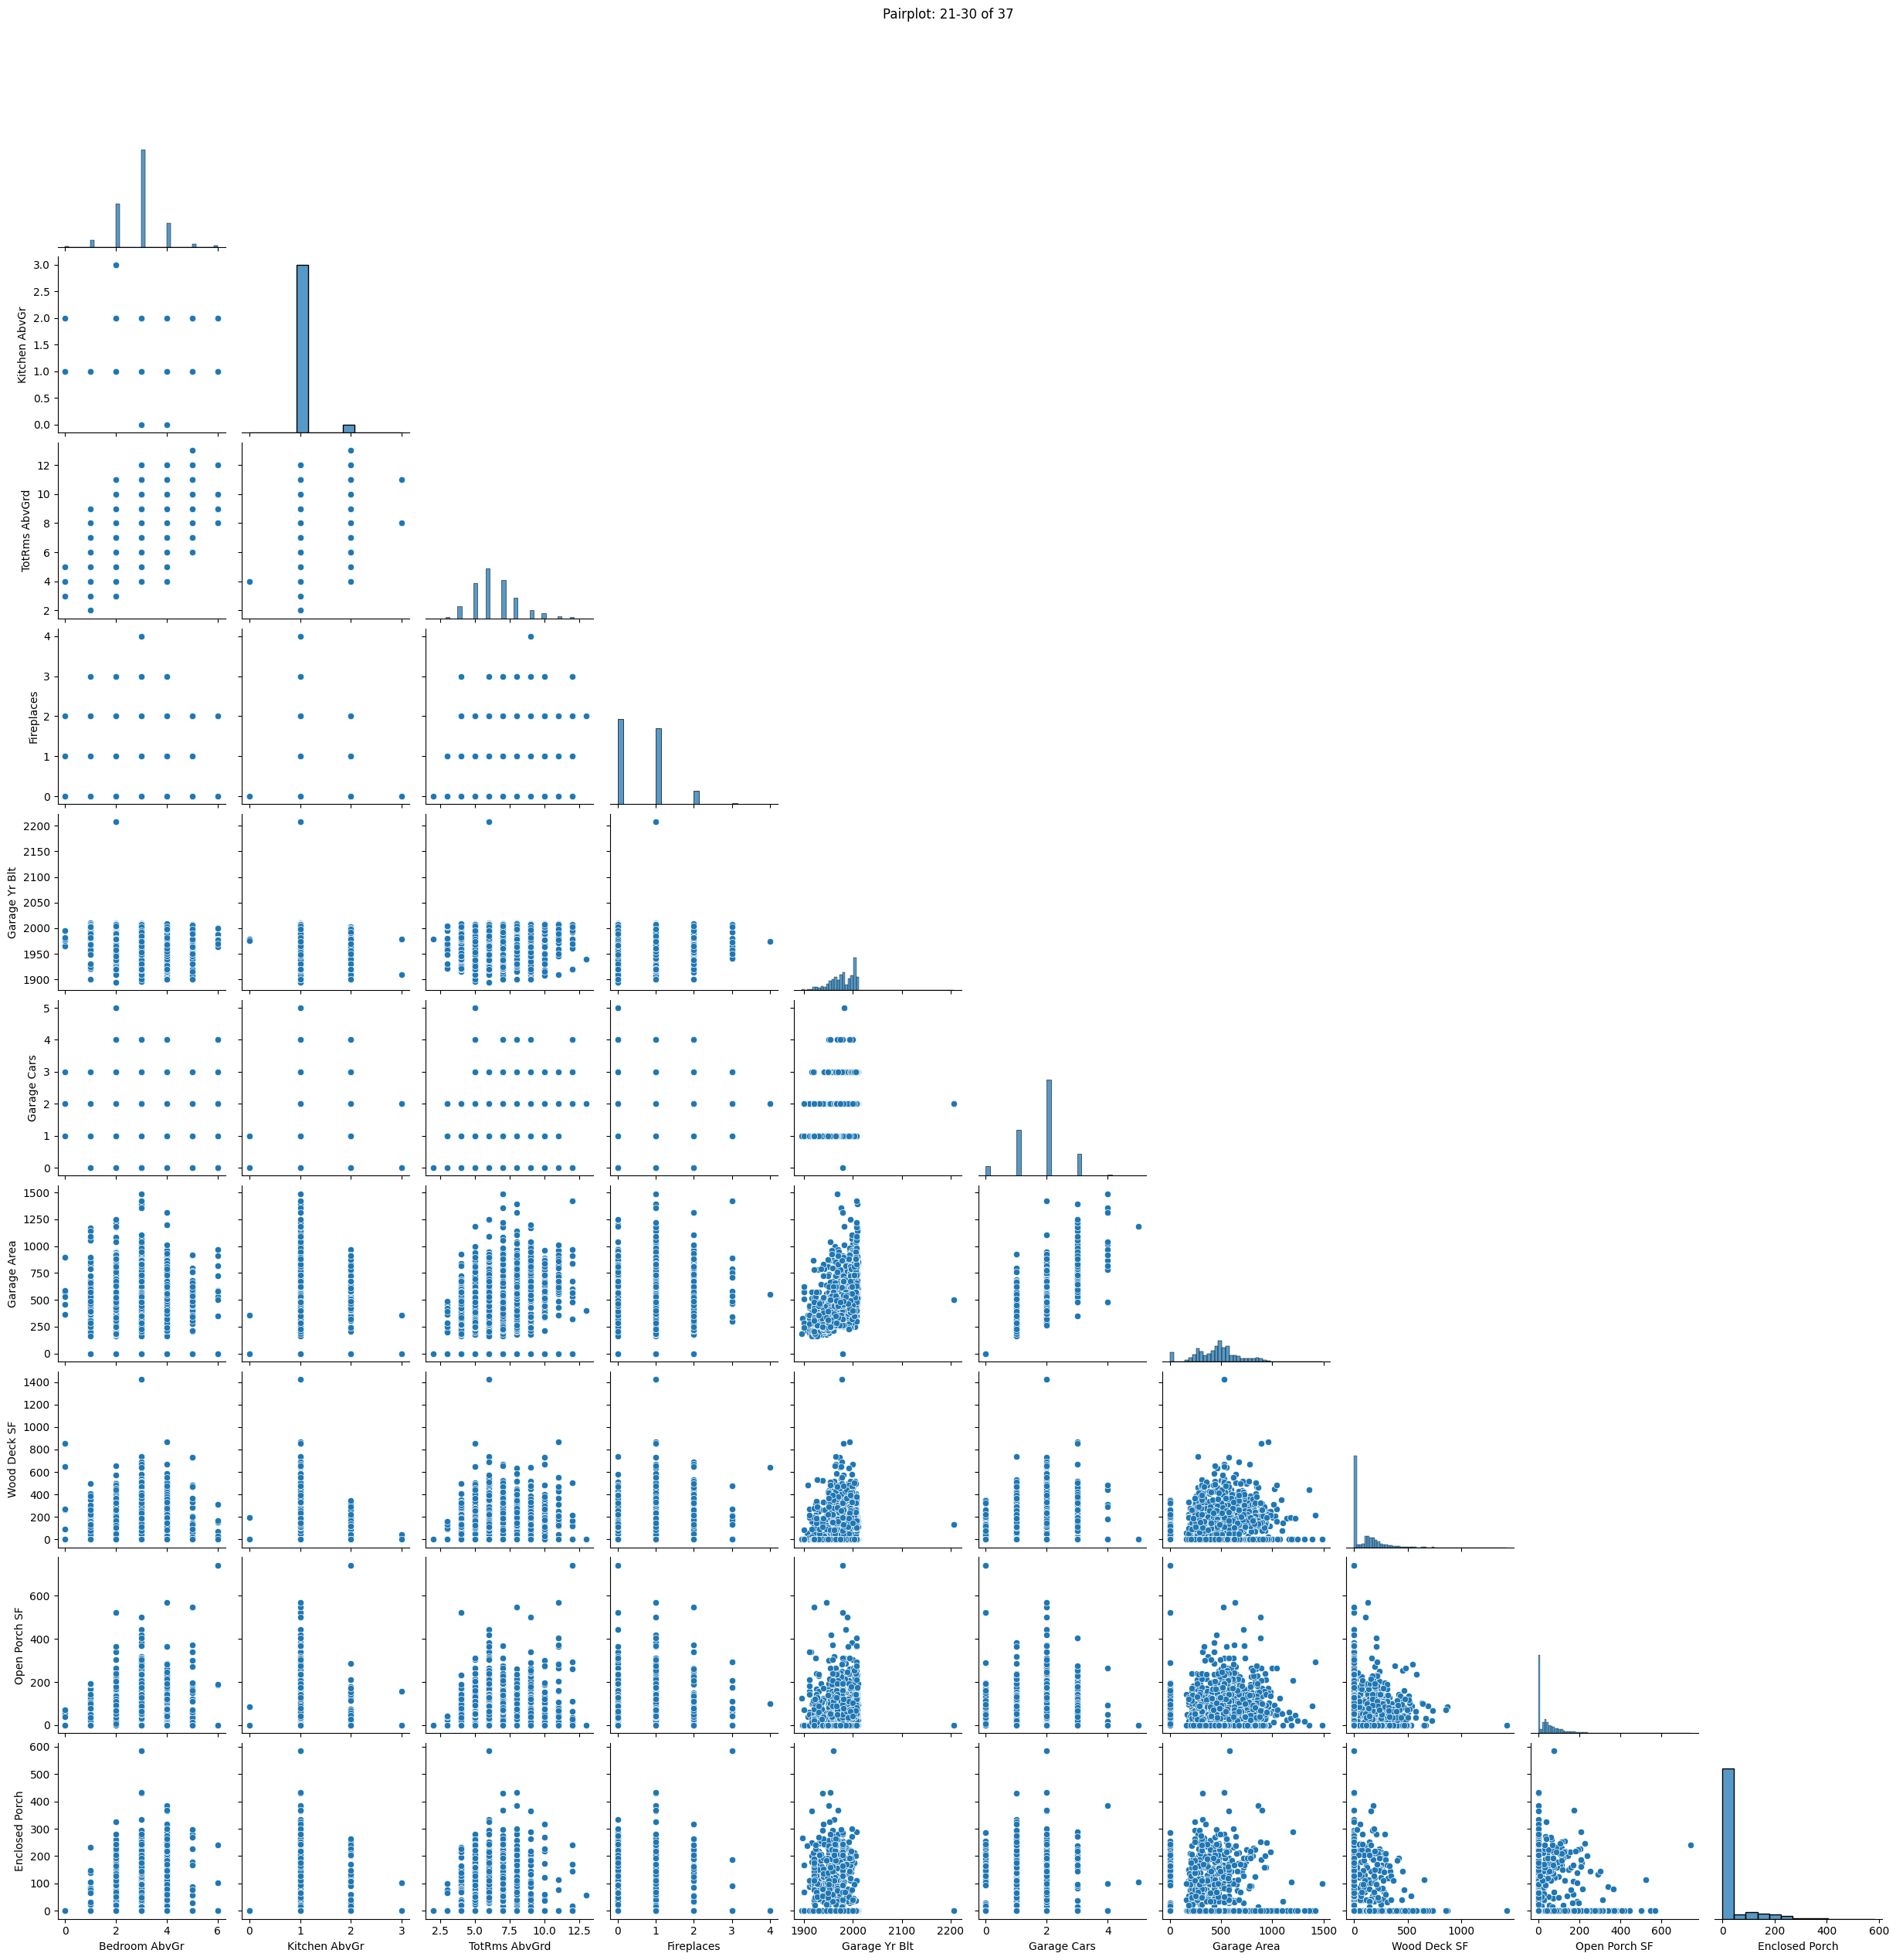

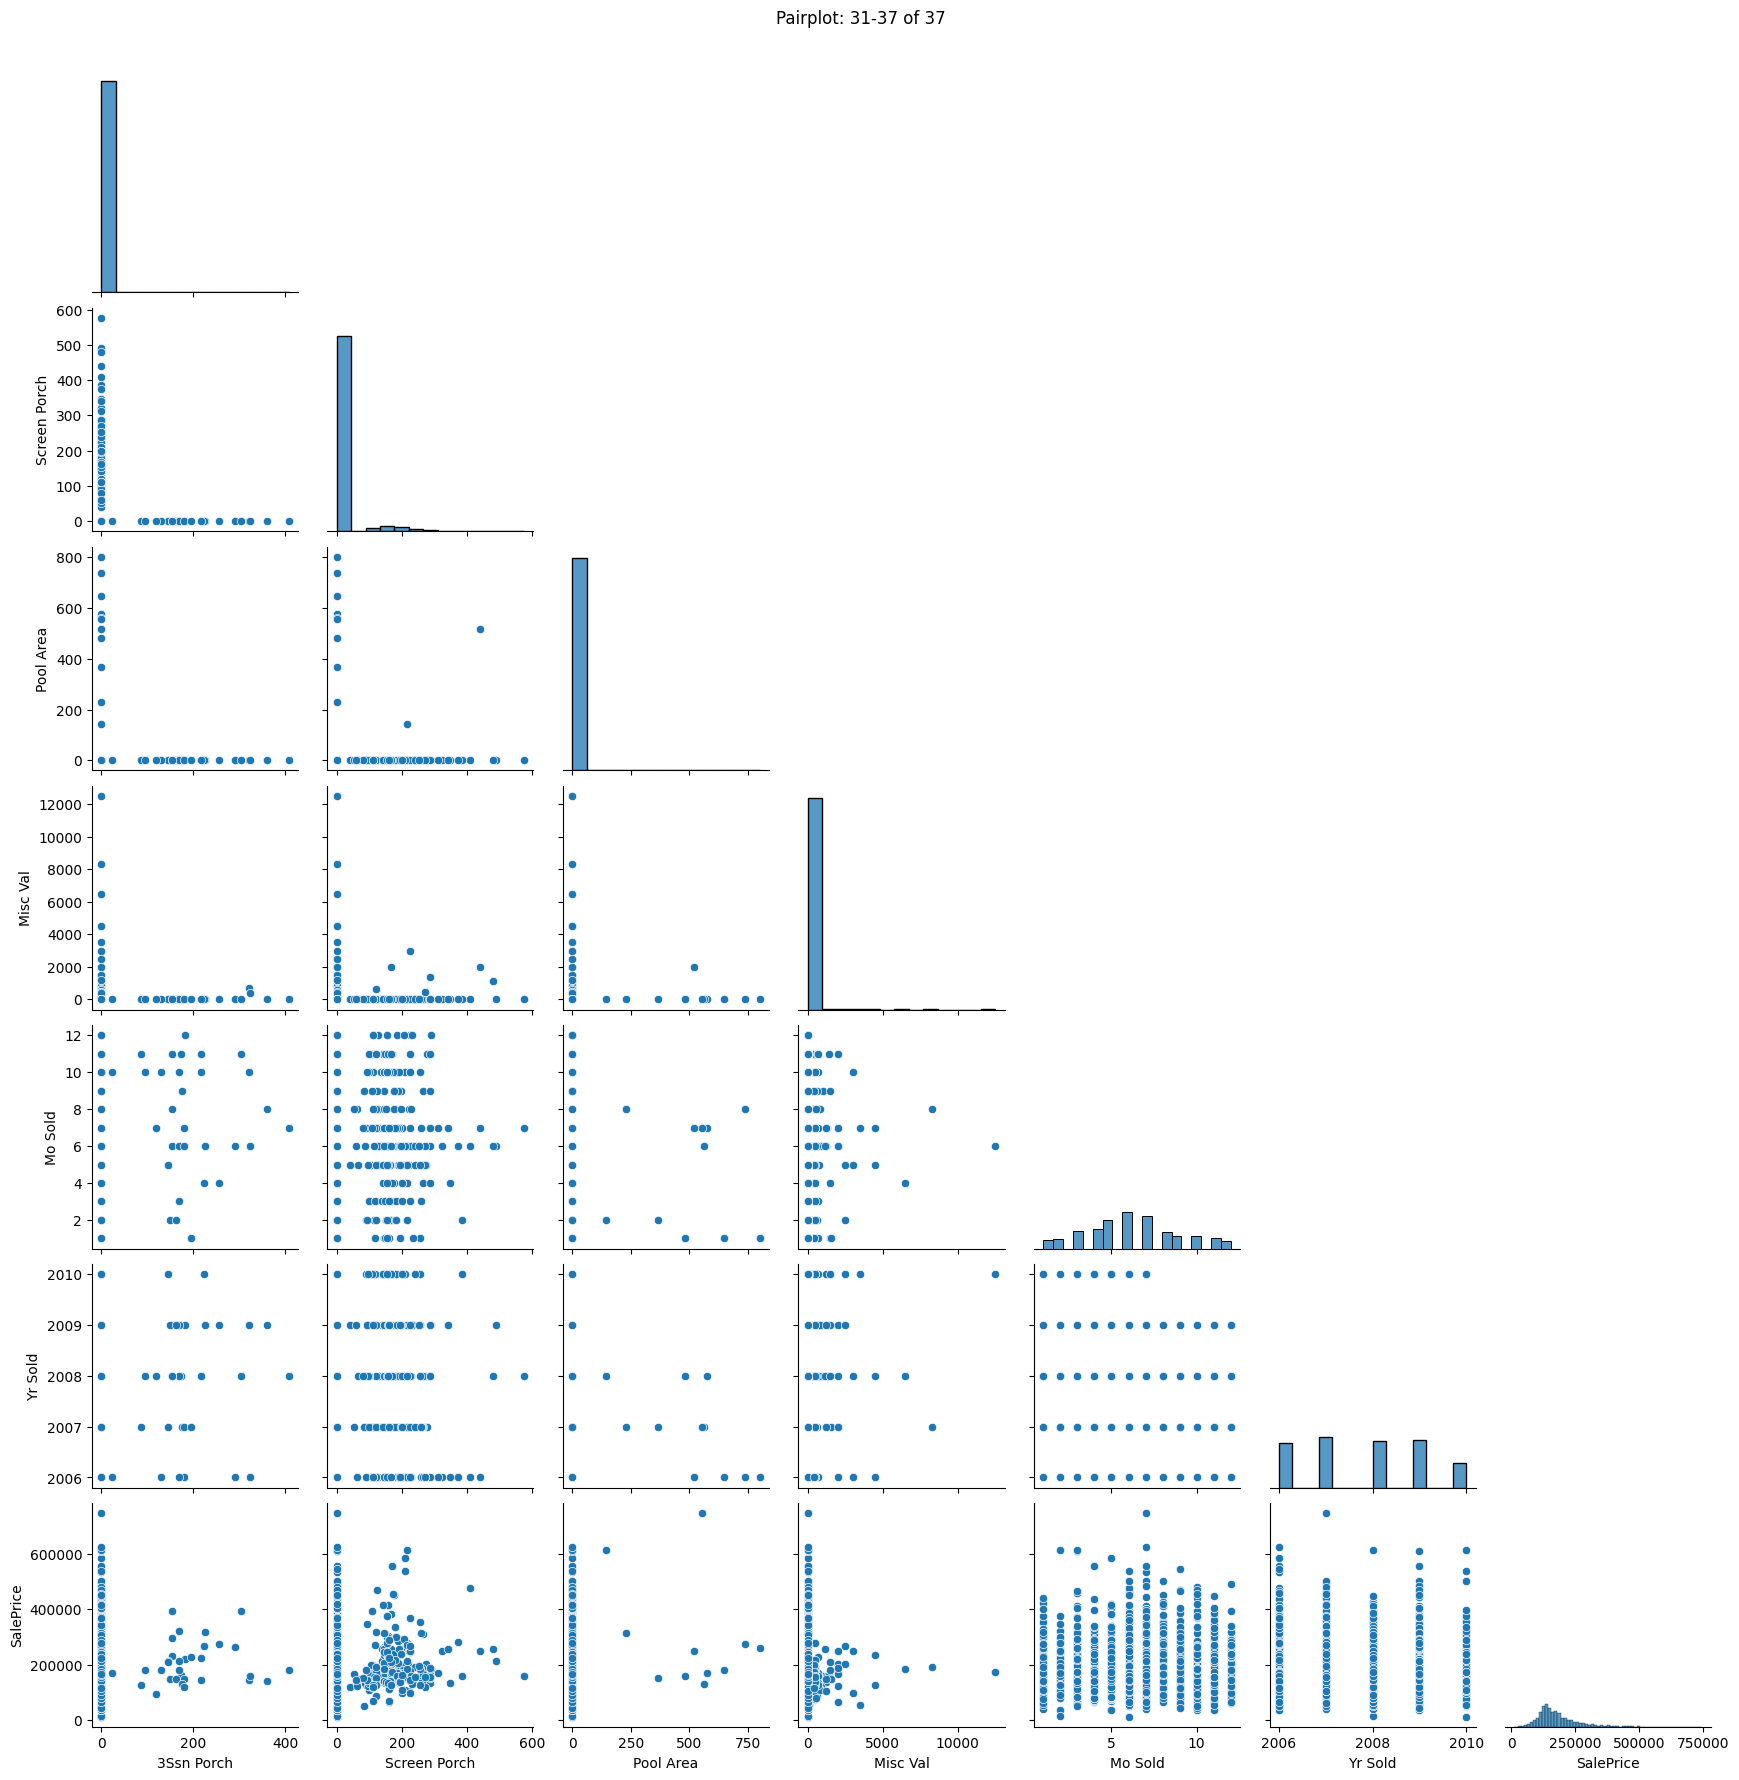

In [ ]:
# View Linearity
num = df.select_dtypes(include="number")
cols = list(num.columns)

chunk_size = 10  # 8–12 is usually readable

for i in range(0, len(cols), chunk_size):
    subset = cols[i:i+chunk_size]
    g = sns.pairplot(num[subset], corner=True, diag_kind="hist")
    g.fig.suptitle(f"Pairplot: {i+1}-{min(i+chunk_size, len(cols))} of {len(cols)}", y=1.02)
    plt.show()

In [ ]:
# Look at our outliers

outlier_summary = {}

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count how many outliers
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary[col] = outliers

# Sort columns by number of outliers
outlier_summary = pd.Series(outlier_summary).sort_values(ascending=False)
print(outlier_summary)


Enclosed Porch     418
BsmtFin SF 2       319
Lot Frontage       231
Overall Cond       231
Screen Porch       227
MS SubClass        186
Mas Vnr Area       183
Bsmt Half Bath     152
Open Porch SF      136
SalePrice          120
Kitchen AbvGr      119
Lot Area           112
Total Bsmt SF      109
Misc Val            94
Bedroom AbvGr       68
Wood Deck SF        64
Gr Liv Area         62
Bsmt Unf SF         49
TotRms AbvGrd       46
1st Flr SF          39
Garage Area         35
Low Qual Fin SF     35
3Ssn Porch          32
Garage Cars         15
Fireplaces          13
BsmtFin SF 1        12
Pool Area           11
Garage Yr Blt        9
Year Built           9
2nd Flr SF           6
Overall Qual         4
Full Bath            3
Bsmt Full Bath       2
Half Bath            0
Year Remod/Add       0
Mo Sold              0
Yr Sold              0
dtype: int64


Text(0, 0.5, 'Count')

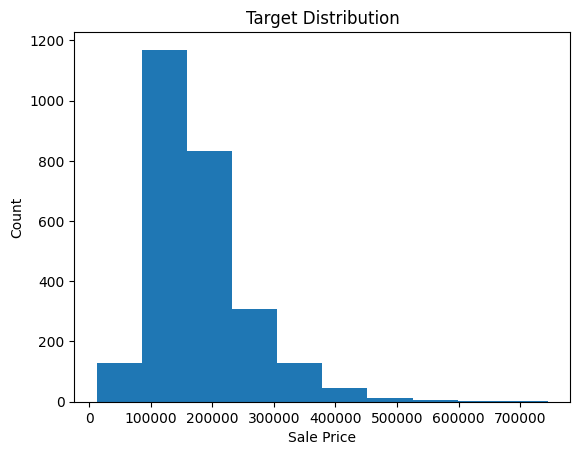

In [ ]:
# Target Distribution
plt.hist(df['SalePrice'])
plt.title('Target Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Count')


Key Findings:

- Identified non-independent features using a correlation heatmap and flagged highly correlated pairs using a |r| ≥ 0.7 threshold

- Examined linearity between numeric predictors and the target using scatter plots and regression lines. Consider log transform on specific features. (Candidates for log transformation were identified based on strong right skew, non-linear feature–target relationships, and the presence of extreme values that dominated scale.)

- Analyzed outliers using the IQR method to understand extreme values and data spread (no removal performed)

- Inspected the target distribution to assess skewness and potential need for transformation

In [ ]:
# Example to pick categorical features to one hot:
 # High median spread = encode, If quality related = encode, Structural = encode, Location = encode
 # Use your best judgment, look at data dictionary and decide!
df.groupby("Neighborhood")["SalePrice"].median().sort_values()


,SalePrice
Neighborhood,
MeadowV,87775.0
IDOTRR,103000.0
BrDale,107000.0
OldTown,119950.0
Edwards,125000.0
BrkSide,126500.0
Blueste,130500.0
Sawyer,135000.0
SWISU,136750.0


In [ ]:
df.groupby("Kitchen Qual")["SalePrice"].median().sort_values()

,SalePrice
Kitchen Qual,
Fa,104000.0
TA,136000.0
Gd,200000.0
Ex,327762.0


## Processing



In [ ]:
# Import Necessary Libraries for Model

import sklearn
import statsmodels.api as sm
from sklearn import datasets, metrics, model_selection, preprocessing
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [ ]:
# Linear model df copy
df_model_ridge = df.copy()

In [ ]:
df_model_ridge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2637 non-null   int64  
 1   MS Zoning        2637 non-null   object 
 2   Lot Frontage     2637 non-null   float64
 3   Lot Area         2637 non-null   int64  
 4   Street           2637 non-null   object 
 5   Lot Shape        2637 non-null   object 
 6   Land Contour     2637 non-null   object 
 7   Utilities        2637 non-null   object 
 8   Lot Config       2637 non-null   object 
 9   Land Slope       2637 non-null   object 
 10  Neighborhood     2637 non-null   object 
 11  Condition 1      2637 non-null   object 
 12  Condition 2      2637 non-null   object 
 13  Bldg Type        2637 non-null   object 
 14  House Style      2637 non-null   object 
 15  Overall Qual     2637 non-null   int64  
 16  Overall Cond     2637 non-null   int64  
 17  Year Built    

In [ ]:
# Split data into train and test sets
features = df_model_ridge.drop(columns = "SalePrice")

# target = fin_df_only_num["SalePrice"]
target = np.log1p(df_model_ridge['SalePrice']) # Implement log transform on target


In [ ]:
features

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,20,RL,62.0,14299,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,7,2007,WD,Normal
1,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,500,10,2006,WD,Normal
2,50,RM,50.0,9000,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,162,0,0,126,0,0,12,2007,WD,Normal
3,60,FV,68.0,7379,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,184,0,0,0,0,0,4,2010,WD,Normal
4,70,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,4,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,50,RM,52.0,6240,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,400,9,2006,WD,Normal
2633,80,RL,74.0,10778,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,7,2009,WD,Normal
2634,120,RL,61.0,3782,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,78,0,0,0,0,0,9,2009,WD,Normal
2635,20,RL,78.0,10140,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,8,2009,WD,Normal


In [ ]:
target

,SalePrice
0,11.656168
1,11.407576
2,11.856522
3,12.445093
4,11.951187
...,...
2632,11.648339
2633,11.995358
2634,12.261985
2635,12.013707


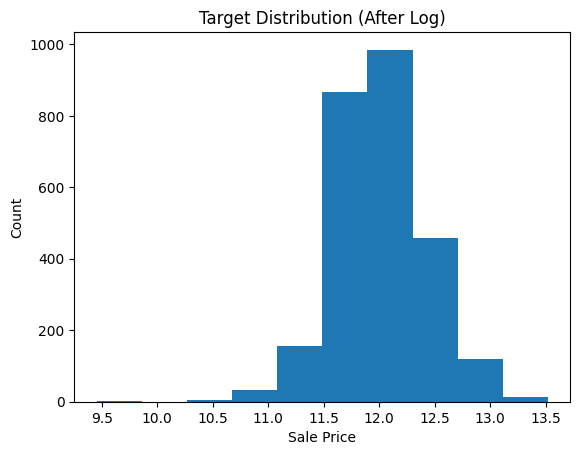

In [ ]:
# Target Distribution (after log)
plt.hist(target)
plt.title('Target Distribution (After Log)')
plt.xlabel('Sale Price')
plt.ylabel('Count')
# save the figure
# plt.savefig("Target Distribution (After Log).png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Drop all categorical features (for now, will do one hot encoding later)
categorical_columns = features.select_dtypes(include=["object", "category"]).columns
features = features.drop(columns=categorical_columns)

In [ ]:
# Check if only dealing w/ numeric cols.
features.dtypes.value_counts()

,count
int64,25
float64,11


In [ ]:
# 1. Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
# 2. Standard Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# View scaled features
pd.DataFrame(X_train_scaled, columns=X_train.columns)


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,-0.178955,-0.902648,-0.783886,-0.782939,0.397347,-1.570319,-1.623142,-0.553056,-0.489529,-0.296711,...,-0.779969,-0.743909,-0.708020,3.502446,-0.108555,-0.280368,-0.055133,-0.104046,-0.463932,1.663083
1,3.120349,-0.419455,0.122156,-0.069053,1.295530,-2.199235,0.765397,-0.553056,-0.971611,-0.296711,...,0.943309,-0.743909,-0.333221,3.021728,-0.108555,-0.280368,-0.055133,-0.104046,-0.833430,0.142735
2,-0.885949,1.513318,-0.002190,-0.069053,0.397347,-0.246286,-0.954351,0.441219,-0.538179,1.732123,...,-0.003547,-0.743909,-0.708020,-0.375351,-0.108555,2.439877,-0.055133,-0.104046,-1.572427,0.902909
3,0.056709,-0.032900,-0.364451,-0.069053,-0.500836,0.713637,0.478772,0.065604,0.173887,-0.296711,...,-0.249729,0.736608,0.236474,-0.375351,-0.108555,-0.280368,-0.055133,-0.104046,-0.463932,-1.377613
4,-0.178955,-0.129539,1.837389,-0.069053,-0.500836,-1.702722,-1.623142,-0.553056,-0.971611,-0.296711,...,-0.732626,-0.743909,-0.708020,6.498926,-0.108555,-0.280368,-0.055133,-0.104046,1.014062,-1.377613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,-0.650285,-0.419455,-0.815129,-0.782939,-1.399019,-1.040706,-1.623142,-0.553056,-0.971611,-0.296711,...,-1.026151,-0.743909,-0.708020,-0.375351,-0.108555,-0.280368,-0.055133,-0.104046,0.644564,0.142735
2105,-0.178955,-0.419455,-0.440215,-0.782939,-1.399019,-0.709698,-0.094477,-0.553056,-0.573561,1.773287,...,-1.101899,-0.743909,-0.708020,2.316673,-0.108555,-0.280368,-0.055133,-0.104046,-0.463932,0.902909
2106,0.528038,-0.032900,0.639538,-0.782939,1.295530,-0.246286,-0.954351,-0.078013,1.270734,-0.296711,...,0.053265,1.024919,-0.708020,-0.375351,-0.108555,-0.280368,-0.055133,-0.104046,-0.833430,1.663083
2107,-0.885949,1.513318,1.832702,-0.782939,-1.399019,-0.378690,1.052022,-0.138775,-0.971611,-0.296711,...,-0.647409,-0.743909,-0.708020,-0.375351,-0.108555,-0.280368,-0.055133,-0.104046,1.753060,0.902909


In [ ]:
pd.DataFrame(X_test_scaled, columns=X_test.columns)


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,0.056709,-0.032900,0.423337,1.358719,-0.500836,0.978444,0.813168,0.861024,1.677629,-0.296711,...,0.413070,0.689855,1.106008,-0.375351,-0.108555,-0.280368,-0.055133,-0.104046,-1.941926,-0.617439
1,-0.885949,-0.032900,-0.039057,-0.782939,-0.500836,-0.544194,-1.384288,-0.553056,-0.750472,1.155816,...,-0.675814,-0.743909,0.341417,-0.375351,-0.108555,-0.280368,-0.055133,-0.104046,-1.572427,0.902909
2,0.056709,0.208696,-0.237293,-0.069053,-0.500836,1.143948,1.099793,-0.553056,-0.971611,-0.296711,...,-0.192918,-0.743909,-0.168310,-0.375351,-0.108555,-0.280368,-0.055133,-0.104046,-1.202929,-0.617439
3,-0.178955,-0.902648,-0.471458,-0.069053,0.397347,-1.570319,-1.623142,-0.553056,0.392814,-0.296711,...,-0.353883,-0.743909,-0.708020,1.643667,-0.108555,-0.280368,-0.055133,-0.104046,-0.463932,-1.377613
4,0.056709,-0.274497,-0.284157,0.644833,-0.500836,1.110847,1.004251,-0.553056,0.461367,-0.296711,...,-0.297072,-0.463390,-0.438165,-0.375351,-0.108555,-0.280368,-0.055133,-0.104046,1.383561,0.142735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,-0.178955,0.450293,0.871985,-0.782939,1.295530,-0.742799,1.004251,-0.553056,-0.281659,2.684792,...,-0.841514,-0.743909,-0.708020,0.922589,-0.108555,-0.280368,-0.055133,-0.104046,1.383561,0.902909
524,-0.885949,0.063738,1.022107,-0.782939,-0.500836,0.812940,0.574314,-0.553056,0.242440,-0.296711,...,-1.092431,1.640503,-0.708020,-0.375351,-0.108555,-0.280368,-0.055133,-0.104046,0.275065,-0.617439
525,-0.885949,-0.032900,-0.288843,-0.782939,1.295530,-0.180085,-0.858810,-0.553056,-0.493951,2.261383,...,-0.746829,0.845699,-0.708020,-0.375351,-0.108555,-0.280368,-0.055133,-0.104046,0.275065,-0.617439
526,-0.885949,-0.419455,-0.571435,-0.782939,-0.500836,-0.279387,-1.002122,-0.553056,0.109757,-0.296711,...,-0.931465,-0.743909,-0.708020,-0.375351,-0.108555,-0.280368,-0.055133,1.417182,-1.941926,0.142735


In [ ]:
# Train and Test Features/Target Shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2109, 36), (528, 36), (2109,), (528,))

In [ ]:
# 3. Load the model
model = Ridge(alpha = 1) # Arbitrarily choosing alpha = 1


In [ ]:
# 4. Fit the model
model.fit(X_train_scaled, y_train)


Ridge(alpha=1)

In [ ]:
# Model Prediction (look at how well the model performed)
y_pred = model.predict(X_test_scaled)

In [ ]:
# Convert both targets back to original dollar prices
y_pred_orig = np.expm1(y_pred)
y_test_orig = np.expm1(y_test)

# Now calculate RMSPE on original prices
rmspe = np.sqrt(np.mean(((y_test_orig - y_pred_orig) / y_test_orig) ** 2))
print(f"RMSPE: {rmspe:.4f}")

RMSPE: 0.1188


In [ ]:
# Pick a better alpha since RMSPE is the same.


# 1. Scale FULL feature set (for alpha selection only)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 2. Alpha values to test
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# 3. Alpha selection using CV RMSE (log target)
results_alpha = []

for a in alph:
    model = Ridge(alpha=a)
    scores = cross_val_score(
        model,
        X_scaled,
        target,   # log-transformed SalePrice
        scoring="neg_root_mean_squared_error",
        cv=10
    )
    rmse = -scores.mean()
    results_alpha.append(rmse)

results_df = pd.DataFrame({
    "Alpha": alph,
    "RMSE": results_alpha
}).sort_values("RMSE")

print(results_df)

# 4. Select best alpha
best_alpha = results_df.iloc[0]["Alpha"]

# 5. Refit Ridge on your original train/test split
model = Ridge(alpha=best_alpha)
model.fit(X_train_scaled, y_train)

# 6. Evaluate with RMSPE on original dollar scale
y_pred = model.predict(X_test_scaled)

y_pred_orig = np.expm1(y_pred)
y_test_orig = np.expm1(y_test)

rmspe = np.sqrt(np.mean(((y_test_orig - y_pred_orig) / y_test_orig) ** 2))
print(f"Ridge RMSPE: {rmspe:.4f}")

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=6.25246e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=7.60747e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=9.77335e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=7.64392e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


           Alpha      RMSE
15  5.000000e+01  0.145906
14  3.000000e+01  0.145976
13  2.000000e+01  0.146025
12  1.000000e+01  0.146085
0   1.000000e-15  0.146108
11  5.000000e+00  0.146120
10  4.000000e+00  0.146127
9   3.000000e+00  0.146135
8   2.000000e+00  0.146142
7   1.000000e+00  0.146150
6   1.000000e-01  0.146157
5   1.000000e-02  0.146158
4   1.000000e-03  0.146158
1   1.000000e-10  0.146158
3   1.000000e-04  0.146159
2   1.000000e-08  0.146159
Ridge RMSPE: 0.1186


In [ ]:
# View coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_,
})
print(coefficients.sort_values(by='Coefficient', ascending=False))

            Feature  Coefficient
3      Overall Qual     0.125307
5        Year Built     0.083974
4      Overall Cond     0.056286
15      Gr Liv Area     0.056205
25      Garage Cars     0.041168
12       1st Flr SF     0.038456
16   Bsmt Full Bath     0.030751
13       2nd Flr SF     0.030745
23       Fireplaces     0.025753
6    Year Remod/Add     0.025193
11    Total Bsmt SF     0.024558
22    TotRms AbvGrd     0.024104
8      BsmtFin SF 1     0.019194
31     Screen Porch     0.017742
18        Full Bath     0.014591
2          Lot Area     0.013770
29   Enclosed Porch     0.013052
27     Wood Deck SF     0.010934
24    Garage Yr Blt     0.009738
17   Bsmt Half Bath     0.006464
30       3Ssn Porch     0.005767
26      Garage Area     0.005742
9      BsmtFin SF 2     0.004834
19        Half Bath     0.004190
10      Bsmt Unf SF     0.003862
28    Open Porch SF     0.002405
33         Misc Val     0.001524
7      Mas Vnr Area     0.001172
14  Low Qual Fin SF     0.000116
34        

In [ ]:
# Model intercept
model.intercept_

np.float64(12.017130725244138)

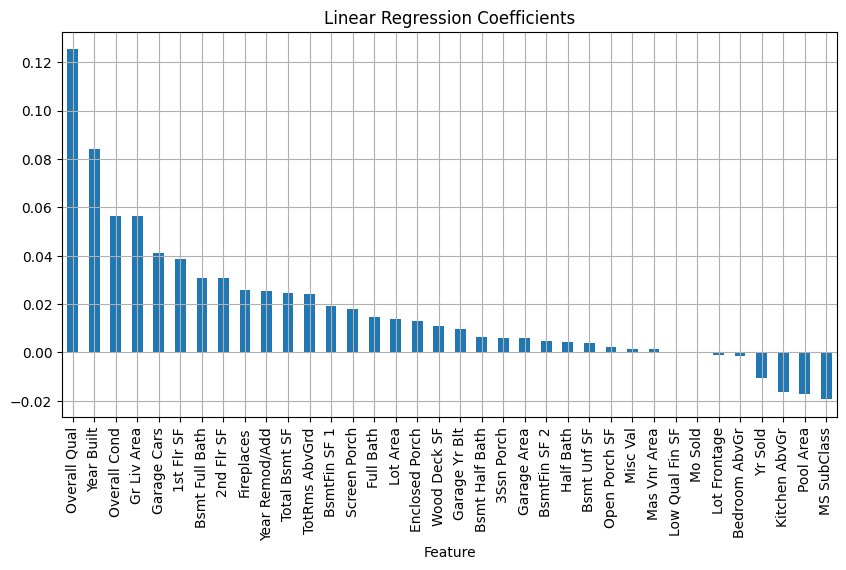

In [ ]:
# Plot the coefficients.
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

coefficients.plot(
    x='Feature',
    y='Coefficient',
    kind='bar',
    figsize=(10,5),
    legend=False
)

plt.grid()
plt.title("Linear Regression Coefficients")
plt.show()

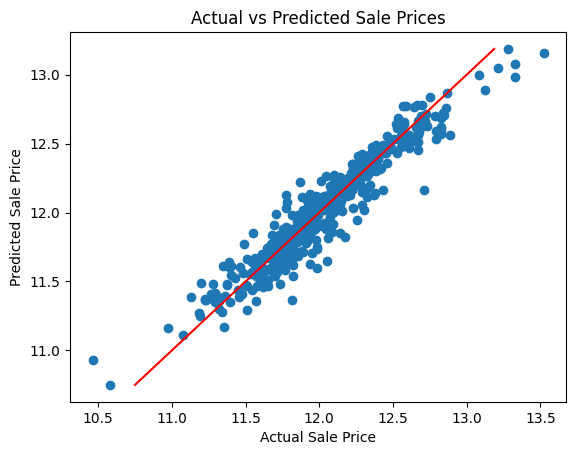

In [ ]:
# See how well our model performs on test data
y_pred = model.predict(X_test_scaled)

plt.scatter(y_test, y_pred)
plt.plot(
    [min(y_pred), max(y_pred)],
    [min(y_pred), max(y_pred)],
    color='red'
)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.show()

## Residual Analysis

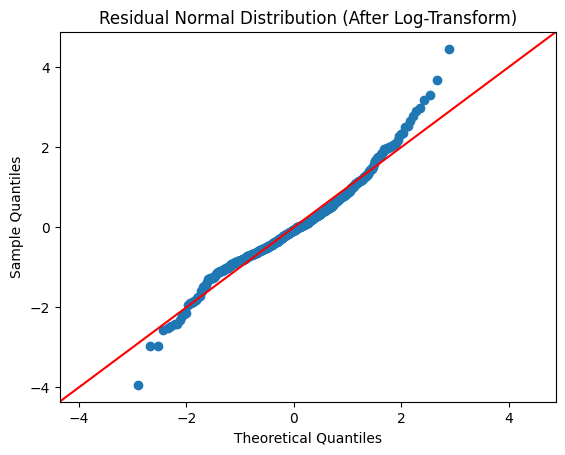

In [ ]:
# Residuals

# QQ Plot - Residuals are normally distributed
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ; # We want to see our points to be lined up on the line to see if they are normally distributed
plt.title("Residual Normal Distribution (After Log-Transform)")

# save the figure
plt.savefig("Residual Normal Distribution (After Log-Transform).png", dpi=300, bbox_inches='tight')
plt.show()


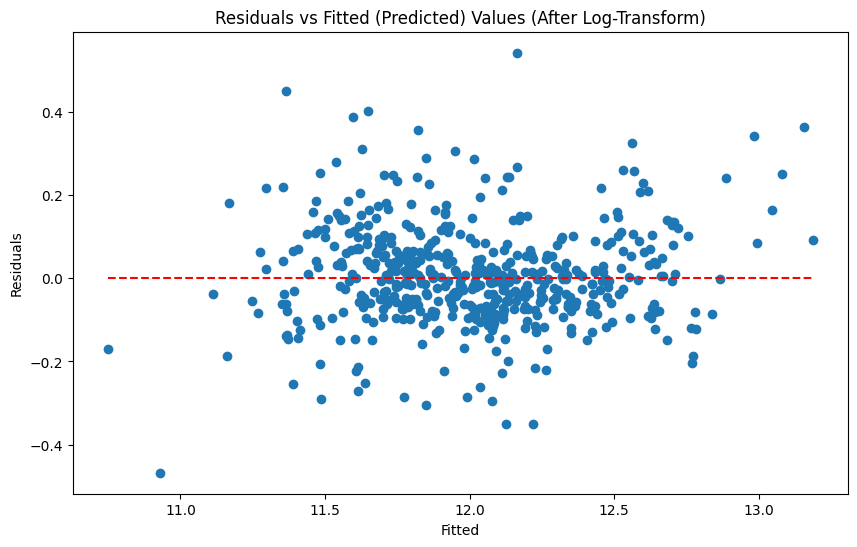

In [ ]:
# Residuals vs Fitted (Predicted) Values - Constant variance
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Predicted) Values (After Log-Transform)")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;



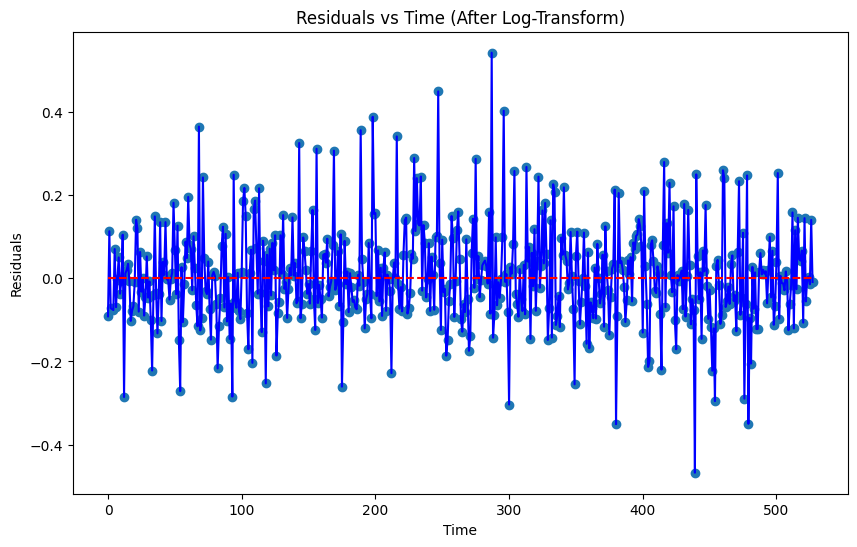

In [ ]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.title("Residuals vs Time (After Log-Transform)")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

# save the figure
plt.savefig("Residuals vs Time (After Log-Transform).png", dpi=300, bbox_inches='tight')
plt.show()

## Cross Validation

In [ ]:
# Perform CV
n = 500
results = np.zeros(n)

for idx in range(n):
    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.20, random_state=idx
    )

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    # Load model
    model = Ridge(alpha=best_alpha)

    # Fit model
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Convert both back to original dollar prices
    y_pred_orig = np.expm1(y_pred)
    y_test_orig = np.expm1(y_test)

    # RMSPE
    mask = y_test_orig != 0
    rmspe = np.sqrt(np.mean(((y_test_orig[mask] - y_pred_orig[mask]) / y_test_orig[mask]) ** 2)) * 100

    results[idx] = rmspe

print(f"CV RMSPE: {results.mean():.2f}%")

CV RMSPE: 30.66%


## Communication of Results


Ridge Regression Results

Ridge regression was implemented using standardized numerical features and a log-transformed sale price as the target variable. Regularization was introduced to address multicollinearity observed in the baseline linear regression model while preserving interpretability.

Initial Ridge Model Performance (α = 1)

Using the default regularization strength α = 1, Ridge regression produced an RMSPE of 11.88% on the fixed 80/20 train–test split (random_state = 42), identical to the baseline linear regression model. This confirms that weak regularization does not alter predictive performance on a single favorable split and that Ridge does not improve accuracy in this setting without stronger penalization.

Alpha Selection

To identify an appropriate regularization strength, Ridge models were evaluated across a wide range of α values using 10-fold cross-validation and RMSE computed on the log-transformed target. Results showed that model performance was largely insensitive to α, with RMSE values remaining nearly constant across all tested values. The lowest cross-validated RMSE was achieved at α = 50, which was selected as the optimal regularization parameter.

The flat RMSE profile indicates that regularization does not meaningfully improve predictive accuracy, but can be applied without performance degradation to stabilize coefficients.

Ridge Model Performance (α = 50)

Using the selected value α = 50, Ridge regression was refit and evaluated on the same 80/20 train–test split. The resulting RMSPE was 11.86%, effectively unchanged from both the linear regression baseline (11.88%) and the Ridge model with α = 1. This confirms that Ridge regularization does not improve single-split predictive accuracy, but also does not harm it.

Coefficient Interpretation

Compared to the unregularized linear model, Ridge regression produced more balanced and stable coefficients, particularly among highly correlated predictors. Overall quality, year built, above-ground living area, and garage capacity remained the strongest positive contributors to predicted sale price. Basement-related features no longer exhibited extreme or conflicting coefficients, indicating that Ridge successfully mitigated multicollinearity effects. Negative coefficients for variables such as kitchen count, pool area, and subclass persisted, reflecting redundancy once overall size and quality are accounted for.

Residual Diagnostics

Residual diagnostics for Ridge regression closely mirror those of the baseline model. Residuals remain approximately normally distributed, show no systematic pattern when plotted against fitted values, and display constant variance across the prediction range. Residuals plotted against time show no trend or autocorrelation, confirming that Ridge regularization does not alter the underlying error structure of the model.

Cross-Validation Performance

Monte Carlo cross-validation using 500 random 80/20 splits was performed with α = 50. The resulting average CV RMSPE was 30.66%, representing a modest improvement over the baseline linear regression CV RMSPE (~31.0%). This indicates that Ridge regression provides slight variance reduction across splits, even though single-split performance remains unchanged.

Summary

Ridge regression confirms that the linear modeling framework is already strong for this dataset. Weak regularization (α = 1) produces identical performance to linear regression, while stronger regularization (α = 50) improves coefficient stability and slightly reduces variance under cross-validation. Although Ridge does not meaningfully improve RMSPE, it provides a more robust and reliable formulation in the presence of multicollinearity, making it a justified refinement of the baseline linear model.